In [8]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy

In [2]:
df=pd.read_csv('rnmp_data\\DeepTraLog\\TraceLogData\\all data\F01-01\\SUCCESSF0101_SpanData2021-08-14_10-22-48.csv')

In [6]:
class TraceNode:
    def __init__(self, start_time, end_time, url, span_type, service, span_id, trace_id, peer, parent_span, component, is_error):
        self.start_time = start_time
        self.end_time = end_time
        self.url = url
        self.span_type = span_type
        self.service = service
        self.span_id = span_id
        self.trace_id = trace_id
        self.peer = peer
        self.parent_span = parent_span
        self.component = component
        self.is_error = is_error
        
    def get_duration(self):
        duration = self.end_time - self.start_time
        return duration

In [9]:
color_map=[]

In [31]:
def add_edges(parent, index):
    # children=df.loc[df['ParentSpan']==parent['SpanId']]['SpanId']
    children=df.loc[df['ParentSpan']==parent['SpanId']]
    print((children[0].tolist()))
    color_map.append('blue')
    if len(children)==0:
        return None
    [G.add_edge(str(element.tolist()),str(parent.tolist())) for element in children]
    [add_edges(el, index+1) for el in children]

In [73]:
def add_edges(parent,index):
    parent_id=parent['SpanId']
    children=df.loc[df['ParentSpan']==parent_id]
    color_map.append('blue')
    if len(children)==0:
        return None
    [add_edges(el, index+1) for el in children]

In [74]:
G=nx.MultiGraph()
color_map=[]
i=0
for index, row in df.iterrows():
    if row['ParentSpan']=='-1':
        i+=1
        color_map.append('red') 
        G.add_edge(str(row.tolist()) , 1)
        add_edges(row, 1)

    if i == 1: 
      break
        

<class 'pandas.core.frame.DataFrame'>


TypeError: string indices must be integers

In [51]:
G.nodes()

NodeView(("[1628884697510, 1628884701848, '{GET}/api/v1/cancelservice/cancel/{orderId}/{loginId}', 'Entry', 'ts-cancel-service', 'a8ac2bc13e5c423d83743ee2d661482b.42.16288846975100028.0', 'a8ac2bc13e5c423d83743ee2d661482b.42.16288846975100029', 'ts-cancel-service', '-1', 'SpringMVC', False]", 1))

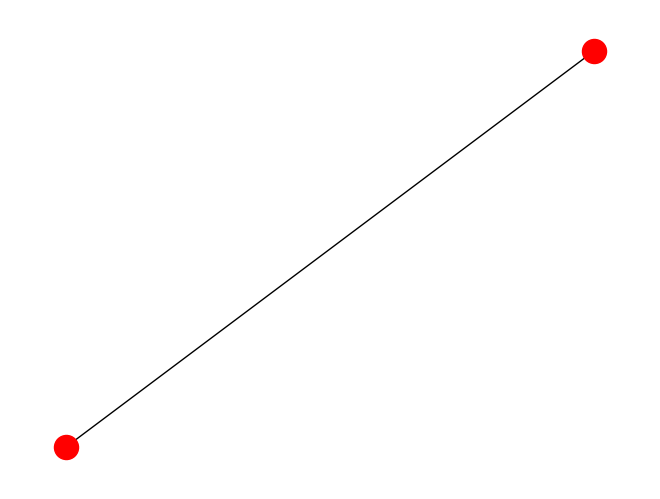

In [39]:
nx.draw(G,node_color=color_map)